In [ ]:
import pandas as pd

red_wine = pd.read_excel('data/winequality-red.xlsx')
white_wine = pd.read_excel('data/winequality-white.xlsx')


In [5]:
# Prepare red wine data
red = red_wine.copy()
red.columns = red.iloc[0]
red = red[1:]
red['type'] = 'red'

# Prepare white wine data
white = white_wine.copy()
white.columns = white.iloc[0]
white = white[1:]
white['type'] = 'white'

# Combine datasets
wine_df = pd.concat([red, white], ignore_index=True)
wine_df.reset_index(drop=True, inplace=True)

Husk at konvertere data fra objekter til numeriske værdier her

In [7]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object', name=0)

In [8]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,red
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         6497 non-null   object
 1   volatile acidity      6497 non-null   object
 2   citric acid           6497 non-null   object
 3   residual sugar        6497 non-null   object
 4   chlorides             6497 non-null   object
 5   free sulfur dioxide   6497 non-null   object
 6   total sulfur dioxide  6497 non-null   object
 7   density               6497 non-null   object
 8   pH                    6497 non-null   object
 9   sulphates             6497 non-null   object
 10  alcohol               6497 non-null   object
 11  quality               6497 non-null   object
 12  type                  6497 non-null   object
dtypes: object(13)
memory usage: 660.0+ KB


In [10]:
# Find duplicate rows in wine_df
duplicates = wine_df[wine_df.duplicated()]
duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
11,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5,red
27,7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5,red
40,7.3,0.45,0.36,5.9,0.074,12,87,0.9978,3.33,0.83,10.5,5,red
65,7.2,0.725,0.05,4.65,0.086,4,11,0.9962,3.41,0.39,10.9,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.23,0.35,10.3,0.042,54,140,0.9967,3.23,0.47,9.2,5,white
6449,7,0.36,0.35,2.5,0.048,67,161,0.99146,3.05,0.56,11.1,6,white
6450,6.4,0.33,0.44,8.9,0.055,52,164,0.99488,3.1,0.48,9.6,5,white
6455,7.1,0.23,0.39,13.7,0.058,26,172,0.99755,2.9,0.46,9,6,white


In [11]:
# Find all rows in wine_df that are identical to row 4
row_4 = wine_df.iloc[4]
identical_rows = wine_df[(wine_df == row_4).all(axis=1)]
identical_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


Vi finder en range (min og max) for alle parametre, så vi kan vurdere om værdierne virker rimelige.

In [12]:
# Convert columns to numeric where possible and calculate min/max for each column
ranges = {}
for col in wine_df.columns:
    # Try to convert to numeric, ignore errors for non-numeric columns
    numeric_col = pd.to_numeric(wine_df[col], errors='coerce')
    min_val = numeric_col.min()
    max_val = numeric_col.max()
    ranges[col] = (min_val, max_val)

ranges

{'fixed acidity': (3.8, 15.9),
 'volatile acidity': (0.08, 1.58),
 'citric acid': (0.0, 1.66),
 'residual sugar': (0.6, 65.8),
 'chlorides': (0.009, 0.611),
 'free sulfur dioxide': (1.0, 289.0),
 'total sulfur dioxide': (6.0, 440.0),
 'density': (0.98711, 1.03898),
 'pH': (2.72, 4.01),
 'sulphates': (0.22, 2.0),
 'alcohol': (8.0, 14.9),
 'quality': (3, 9),
 'type': (nan, nan)}

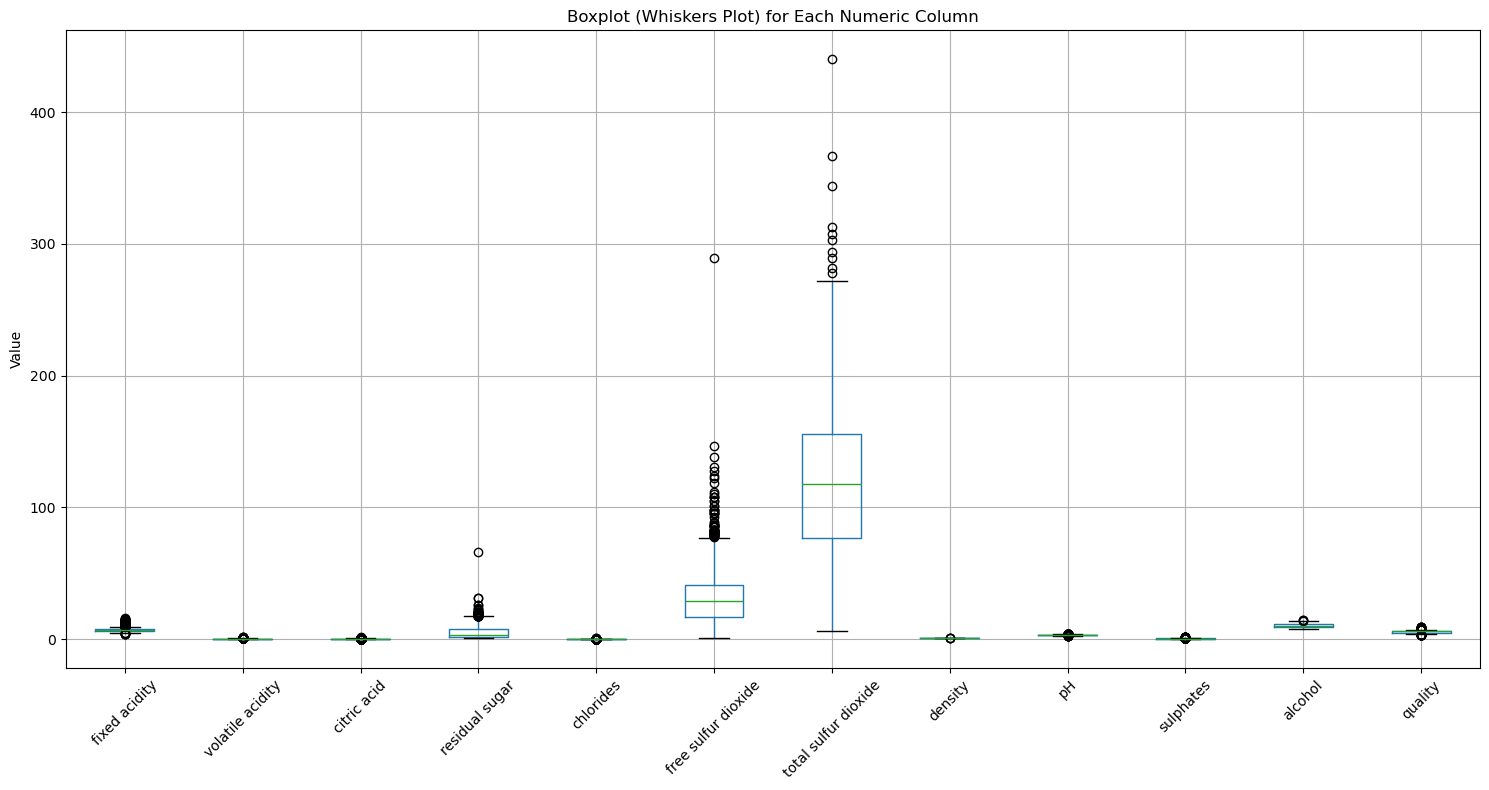

In [13]:
import matplotlib.pyplot as plt

# Convert columns to numeric where possible, except 'type'
numeric_wine_df = wine_df.copy()
for col in numeric_wine_df.columns:
    if col != 'type':
        numeric_wine_df[col] = pd.to_numeric(numeric_wine_df[col], errors='coerce')

# Select only numeric columns for boxplot
numeric_cols = numeric_wine_df.select_dtypes(include='number').columns

# Create boxplots for each numeric column
plt.figure(figsize=(15, 8))
numeric_wine_df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot (Whiskers Plot) for Each Numeric Column')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

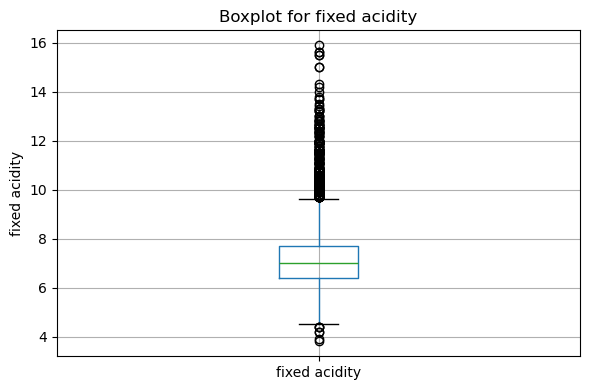

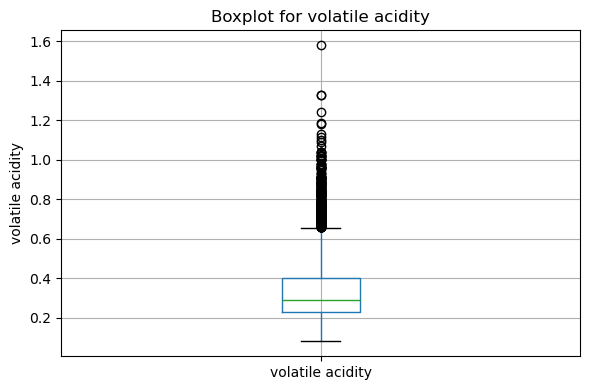

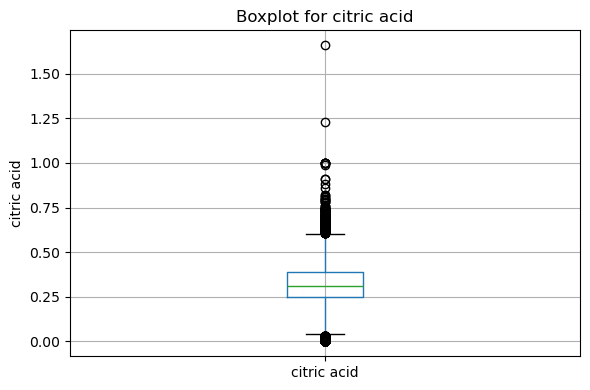

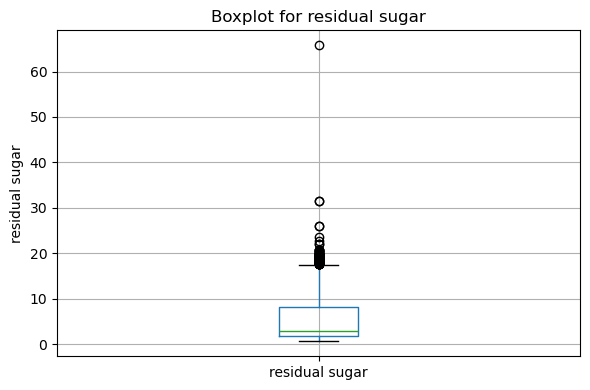

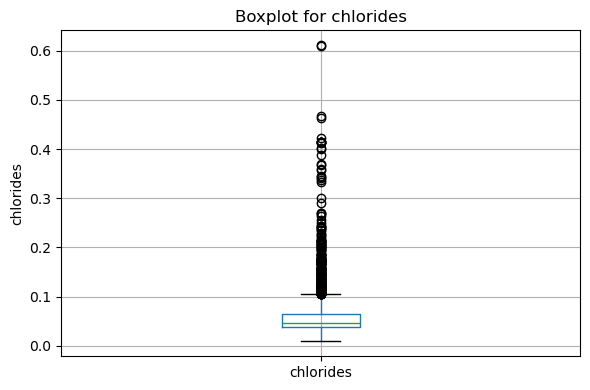

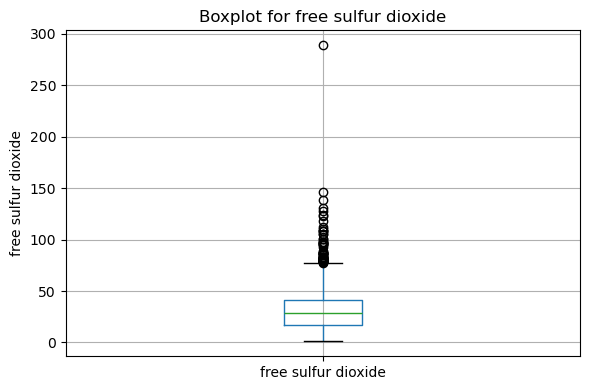

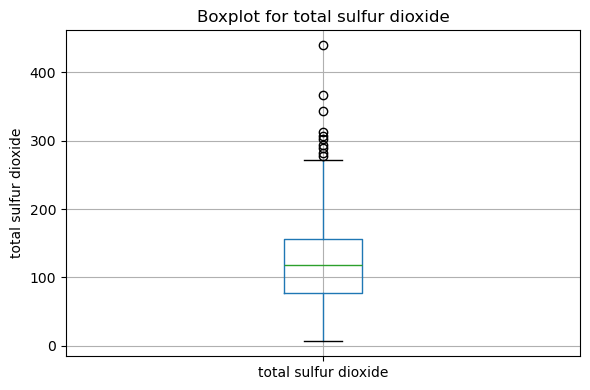

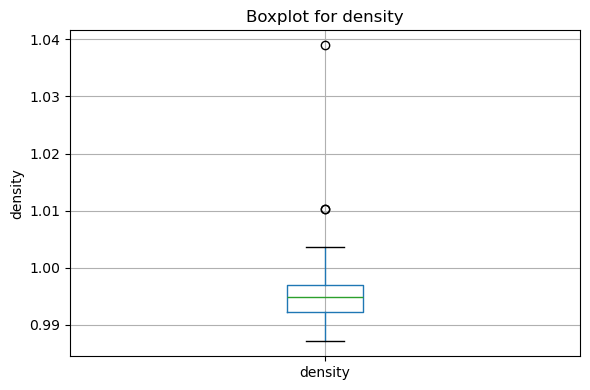

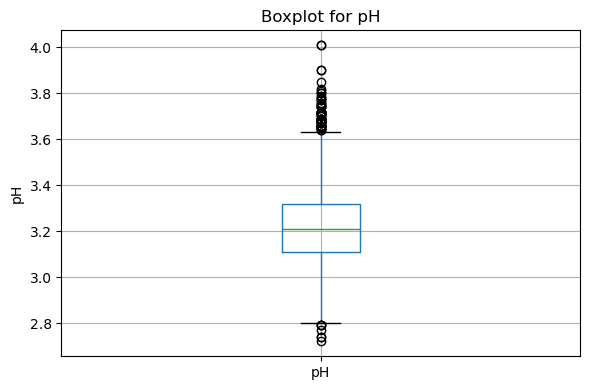

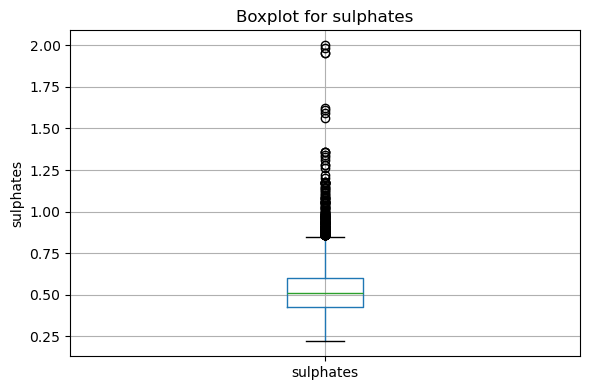

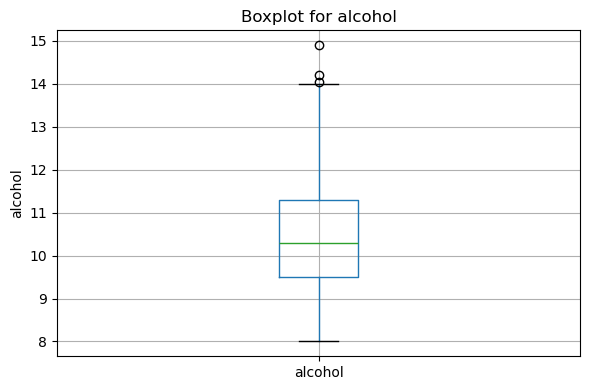

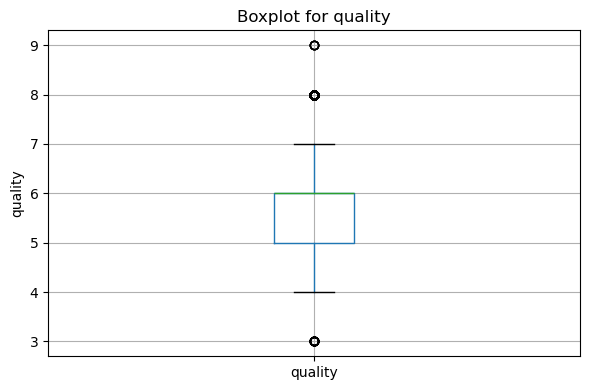

In [14]:
for column in numeric_cols:
    plt.figure(figsize=(6, 4))
    numeric_wine_df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()